# ML Assignment 1

Data set 1 - Bank Account Fraud Dataset \
https://www.kaggle.com/datasets/sgpjesus/bank-account-fraud-dataset-neurips-2022 \
Data set 2 - Customer Segmentation \
https://www.kaggle.com/datasets/abisheksudarshan/customer-segmentation?select=train.csv


In [1]:
# Load function and data

In [2]:
%run ./ML_assignment1_Functions.ipynb

In [3]:
from sklearn import svm as sv
# load data
df = load_data('Base.csv')

In [4]:
## model1.1 - NN with Feature engineering

In [5]:
# train valid test split
X_train, y_train, X_valid, y_valid, X_test, y_test = train_valid_test_split(df)
# feature engineering
X_train, X_valid, X_test = ohe(X_train, X_valid, X_test)
# oversampling
X_train, y_train = oversampling(X_train, y_train)
# model
params = {'kernel': 'rbf', 
          'C': 1
         }
svm = sv.SVC(random_state=0, kernel='rbf', C=1)
svm.fit(X_train, y_train)
svm_fe = model(svm, X_train, y_train, X_valid, y_valid)

svm_fe['kernel'] = 'rbf'
svm_fe['C'] = str(1)
svm_fe['name'] = 'svm_Feature_engineering'
svm_fe

,acc,cv_score,train_roc,test_roc,recall_score,f1_score,run_time,kernel,C,name
0,0.612,0.758,0.758,0.729,0.612,0.619,2.15625,rbf,1,svm_Feature_engineering


In [6]:
## model1.2 - SVM with tuning

In [7]:
# train valid test split
X_train, y_train, X_valid, y_valid, X_test, y_test = train_valid_test_split(df)
# feature engineering
X_train, X_valid, X_test = ohe(X_train, X_valid, X_test)
# oversampling
X_train, y_train = oversampling(X_train, y_train)
# model
params = {'kernel': ['rbf','sigmoid'], #,
          'C': [1,1.5,2] }
svm_tune_perf = pd.DataFrame()
for x in params['kernel']:
#     print(x)
    for y in params['C']:
#         print(y)
        svm = sv.SVC(random_state=0, kernel=x, C=y)
        svm_tune = model(svm, X_train, y_train, X_valid, y_valid)
        svm_tune['kernel'] =  x
        svm_tune['C'] = str(y)
        svm_tune_perf = svm_tune_perf.append(svm_tune)

svm_tune_perf['name'] = 'svm_tune'
svm_tune_perf

,acc,cv_score,train_roc,test_roc,recall_score,f1_score,run_time,kernel,C,name
0,0.612,0.758,0.758,0.729,0.612,0.619,0.85938,rbf,1,svm_tune
0,0.612,0.758,0.758,0.729,0.612,0.619,0.79688,rbf,1.5,svm_tune
0,0.612,0.758,0.758,0.729,0.612,0.619,0.82812,rbf,2,svm_tune
0,0.635,0.674,0.673,0.677,0.635,0.652,0.28125,sigmoid,1,svm_tune
0,0.634,0.672,0.674,0.677,0.634,0.651,0.32812,sigmoid,1.5,svm_tune
0,0.634,0.672,0.674,0.675,0.634,0.651,0.34375,sigmoid,2,svm_tune


In [8]:
## model1.3 - SVM with Grid Search

In [9]:
# train valid test split
X_train, y_train, X_valid, y_valid, X_test, y_test = train_valid_test_split(df)
# feature engineering
X_train, X_valid, X_test = ohe(X_train, X_valid, X_test)
# oversampling
X_train, y_train = oversampling(X_train, y_train)
# model
t_start = process_time()
params = {'kernel': ['rbf','sigmoid'], 
          'C': [0.5,1,1.5,2] }
svm = GridSearchCV(sv.SVC(), params, scoring='roc_auc', n_jobs=-1, cv=3)
svm.fit(X=X_train, y=y_train)
t_stop = process_time()
print (svm.best_score_, svm.best_params_, 'time spend: ', round(t_stop - t_start, 3)) 
ke = svm.best_params_['kernel']
c = svm.best_params_['C']

0.7718739881924209 {'C': 1.5, 'kernel': 'rbf'} time spend:  0.531


In [10]:
svm=sv.SVC(random_state=0, kernel=ke, C=c)
svm_gs_perf = model(svm, X_train, y_train, X_valid, y_valid)
svm_gs_perf['kernel'] = ke 
svm_gs_perf['C'] = c
svm_gs_perf['name'] = 'svm_grid_search'
svm_gs_perf

,acc,cv_score,train_roc,test_roc,recall_score,f1_score,run_time,kernel,C,name
0,0.612,0.758,0.758,0.729,0.612,0.619,0.95312,rbf,1.5,svm_grid_search


In [11]:
# model4 - SVM with learning curve

In [12]:
# train valid test split
X_train, y_train, X_valid, y_valid, X_test, y_test = train_valid_test_split(df)
# create an empty df for output
svm_lc_perf_out = pd.DataFrame()
for r in [0.1, 0.2,0.3, 0.4, 0.5,0.6, 0.7,0.8,0.9,1.0]:
    # frac train set to build model
#     print(len(X_train))
    X_trainf = X_train.sample(frac = r, random_state=0)
    y_trainf = y_train.loc[X_trainf.index]
    
#     print(len(X_trainf), len(y_trainf))
    # feature engineering
    X_trainf, X_valid, X_test = ohe(X_trainf, X_valid, X_test)
    # oversampling
    X_trainf, y_trainf = oversampling(X_trainf, y_trainf)
    # model
    params = {'kernel': ke, 
          'C': c }
    svm = sv.SVC(random_state=0, kernel=ke, C=c)
#     svm.fit(X_trainf, y_trainf)
#     # plot loss curve
#     plt.plot(svm.loss_curve_, label = "train_size_"+str(r))
#     plt.xlabel("Iteration")
#     plt.ylabel("Loss")
#     plt.legend()
    
    lc_perf = model(svm, X_trainf, y_trainf, X_valid, y_valid)
    # add columns
    lc_perf['train_ratio'] = str(r)
    lc_perf['kernel'] = ke
    lc_perf['C'] = c
    lc_perf['name'] = 'svm_train_size'
    svm_lc_perf_out = svm_lc_perf_out.append(lc_perf)
    
svm_lc_perf_out

,acc,cv_score,train_roc,test_roc,recall_score,f1_score,run_time,train_ratio,kernel,C,name
0,0.778,0.638,0.638,0.610,0.778,0.721,0.01562,0.1,rbf,1.5,svm_train_size
0,0.846,0.728,0.728,0.730,0.846,0.825,0.01562,0.2,rbf,1.5,svm_train_size
0,0.911,0.847,0.847,0.844,0.911,0.906,0.01562,0.3,rbf,1.5,svm_train_size
0,0.972,0.951,0.951,0.952,0.972,0.972,0.03125,0.4,rbf,1.5,svm_train_size
0,0.960,0.980,0.980,0.972,0.960,0.961,0.03125,0.5,rbf,1.5,svm_train_size
0,0.872,0.940,0.940,0.911,0.872,0.878,0.10938,0.6,rbf,1.5,svm_train_size
0,0.804,0.895,0.895,0.863,0.804,0.813,0.25000,0.7,rbf,1.5,svm_train_size
0,0.740,0.846,0.846,0.818,0.740,0.752,0.31250,0.8,rbf,1.5,svm_train_size
0,0.672,0.800,0.800,0.771,0.672,0.684,0.64062,0.9,rbf,1.5,svm_train_size
0,0.612,0.758,0.758,0.729,0.612,0.619,0.89062,1.0,rbf,1.5,svm_train_size


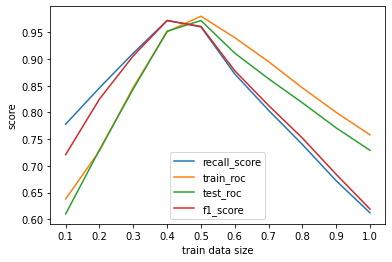

In [13]:
learning_curve_graph(svm_lc_perf_out)

In [14]:
# SVM test set output

In [15]:
# train valid test split
X_train, y_train, X_valid, y_valid, X_test, y_test = train_valid_test_split(df)
# feature engineering
X_train, X_valid, X_test = ohe(X_train, X_valid, X_test)
# oversampling
X_train, y_train = oversampling(X_train, y_train)
# model
params = {'kernel': ke,
          'C': c}
svm =  sv.SVC(random_state=0, kernel=ke, C=c)
svm.fit(X_train, y_train)
svm_test_perf = model(svm, X_train, y_train, X_test, y_test)
svm_test_perf['kernel'] = ke
svm_test_perf['C'] = c
svm_test_perf['name'] = 'svm_test'
svm_test_perf

,acc,cv_score,train_roc,test_roc,recall_score,f1_score,run_time,kernel,C,name
0,0.645,0.758,0.758,0.751,0.645,0.654,0.875,rbf,1.5,svm_test


In [16]:
svm_performance = pd.DataFrame()
svm_performance=svm_performance.append([svm_fe,svm_tune_perf,svm_gs_perf,svm_lc_perf_out,svm_test_perf]).reset_index()
svm_performance

,index,acc,cv_score,train_roc,test_roc,recall_score,f1_score,run_time,kernel,C,name,train_ratio
0,0,0.612,0.758,0.758,0.729,0.612,0.619,2.15625,rbf,1,svm_Feature_engineering,NaN
1,0,0.612,0.758,0.758,0.729,0.612,0.619,0.85938,rbf,1,svm_tune,NaN
2,0,0.612,0.758,0.758,0.729,0.612,0.619,0.79688,rbf,1.5,svm_tune,NaN
3,0,0.612,0.758,0.758,0.729,0.612,0.619,0.82812,rbf,2,svm_tune,NaN
4,0,0.635,0.674,0.673,0.677,0.635,0.652,0.28125,sigmoid,1,svm_tune,NaN
5,0,0.634,0.672,0.674,0.677,0.634,0.651,0.32812,sigmoid,1.5,svm_tune,NaN
6,0,0.634,0.672,0.674,0.675,0.634,0.651,0.34375,sigmoid,2,svm_tune,NaN
7,0,0.612,0.758,0.758,0.729,0.612,0.619,0.95312,rbf,1.5,svm_grid_search,NaN
8,0,0.778,0.638,0.638,0.610,0.778,0.721,0.01562,rbf,1.5,svm_train_size,0.1
9,0,0.846,0.728,0.728,0.730,0.846,0.825,0.01562,rbf,1.5,svm_train_size,0.2


In [17]:
svm_performance.to_excel('./performance/svm_perf_data1.xlsx',index=False)

# Data 2

In [18]:
from sklearn import svm as sv
# load data
df = load_data('customer_segment.csv')
df.drop(columns= ['ID'],inplace=True)
# transform target variable
from sklearn.preprocessing import LabelEncoder
df.Segmentation=LabelEncoder().fit_transform(df.Segmentation)

In [19]:
## model2.1 - SVM with Feature engineering

In [20]:
# train valid test split
X_train, y_train, X_valid, y_valid, X_test, y_test = train_valid_test_split2(df)
# feature engineering
X_train, X_valid, X_test = ohe(X_train, X_valid, X_test)
# model
params = {'kernel': 'rbf', 
          'C': 1
         }
svm = sv.SVC(random_state=0, kernel='rbf', C=1,probability=True)
svm.fit(X_train, y_train)
svm_fe = model2(svm, X_train, y_train, X_valid, y_valid)

svm_fe['kernel'] = 'rbf'
svm_fe['C'] = str(1)
svm_fe['name'] = 'svm_Feature_engineering'
svm_fe

,acc,cv_score,train_roc,test_roc,recall_score,f1_score,run_time,kernel,C,name
0,0.415,0.385,0.704,0.701,0.415,0.337,1.891,rbf,1,svm_Feature_engineering


In [21]:
## model2.2 - SVM with tuning

In [22]:
# train valid test split
X_train, y_train, X_valid, y_valid, X_test, y_test = train_valid_test_split2(df)
# feature engineering
X_train, X_valid, X_test = ohe(X_train, X_valid, X_test)

# model
params = {'kernel': ['rbf','sigmoid'], #,
          'C': [1,1.5,2] }
svm_tune_perf = pd.DataFrame()
for x in params['kernel']:
    print(x)
    for y in params['C']:
        print(y)
        svm = sv.SVC(random_state=0, kernel=x, C=y,probability=True)
        svm_tune = model2(svm, X_train, y_train, X_valid, y_valid)
        svm_tune['kernel'] =  x
        svm_tune['C'] = str(y)
        svm_tune_perf = svm_tune_perf.append(svm_tune)

svm_tune_perf['name'] = 'svm_tune'
svm_tune_perf

rbf
1
1.5
2
sigmoid
1
1.5
2


,acc,cv_score,train_roc,test_roc,recall_score,f1_score,run_time,kernel,C,name
0,0.415,0.385,0.704,0.701,0.415,0.337,1.938,rbf,1,svm_tune
0,0.458,0.408,0.726,0.719,0.458,0.388,1.734,rbf,1.5,svm_tune
0,0.469,0.437,0.736,0.728,0.469,0.415,1.844,rbf,2,svm_tune
0,0.306,0.277,0.519,0.557,0.306,0.253,0.938,sigmoid,1,svm_tune
0,0.308,0.293,0.519,0.557,0.308,0.257,0.938,sigmoid,1.5,svm_tune
0,0.310,0.291,0.519,0.558,0.310,0.259,1.109,sigmoid,2,svm_tune


In [23]:
## model2.3 - SVM with Grid Search

In [24]:
# train valid test split
X_train, y_train, X_valid, y_valid, X_test, y_test = train_valid_test_split2(df)
# feature engineering
X_train, X_valid, X_test = ohe(X_train, X_valid, X_test)
# model
t_start = process_time()
params = {'kernel': ['rbf','sigmoid'], 
          'C': [1,3,5,7,9],
          'probability':[True] }
from sklearn.metrics import make_scorer,roc_auc_score
score = {'auc': make_scorer(roc_auc_score, needs_proba=True, multi_class="ovr")}
svm = GridSearchCV(sv.SVC(), params, scoring=score['auc'], n_jobs=-1, cv=3)
svm.fit(X=X_train, y=y_train)
t_stop = process_time()
print (svm.best_score_, svm.best_params_, 'time spend: ', round(t_stop - t_start, 3)) 
ke = svm.best_params_['kernel']
c = svm.best_params_['C']

0.7327745221113932 {'C': 9, 'kernel': 'rbf', 'probability': True} time spend:  0.984


In [25]:
svm=sv.SVC(random_state=0, kernel=ke, C=c,probability=True)
svm_gs_perf = model2(svm, X_train, y_train, X_valid, y_valid)
svm_gs_perf['kernel'] = ke 
svm_gs_perf['C'] = c
svm_gs_perf['name'] = 'svm_grid_search'
svm_gs_perf

,acc,cv_score,train_roc,test_roc,recall_score,f1_score,run_time,kernel,C,name
0,0.504,0.478,0.762,0.745,0.504,0.488,1.844,rbf,9,svm_grid_search


In [26]:
# model2.4 - SVM with learning curve

In [27]:
# train valid test split
X_train, y_train, X_valid, y_valid, X_test, y_test = train_valid_test_split2(df)
# create an empty df for output
svm_lc_perf_out = pd.DataFrame()
for r in [0.1, 0.2,0.3, 0.4, 0.5,0.6, 0.7,0.8,0.9,1.0]:
    # frac train set to build model
#     print(len(X_train))
    X_trainf = X_train.sample(frac = r, random_state=0)
    y_trainf = y_train.loc[X_trainf.index]
    
#     print(len(X_trainf), len(y_trainf))
    # feature engineering
    X_trainf, X_valid, X_test = ohe(X_trainf, X_valid, X_test)
    # model
    params = {'kernel': ke, 
          'C': c }
    svm = sv.SVC(random_state=0, kernel=ke, C=c,probability=True)
#     svm.fit(X_trainf, y_trainf)
#     # plot loss curve
#     plt.plot(svm.loss_curve_, label = "train_size_"+str(r))
#     plt.xlabel("Iteration")
#     plt.ylabel("Loss")
#     plt.legend()
    
    lc_perf = model2(svm, X_trainf, y_trainf, X_valid, y_valid)
    # add columns
    lc_perf['train_ratio'] = str(r)
    lc_perf['kernel'] = ke
    lc_perf['C'] = c
    lc_perf['name'] = 'svm_train_size'
    svm_lc_perf_out = svm_lc_perf_out.append(lc_perf)
    
svm_lc_perf_out

,acc,cv_score,train_roc,test_roc,recall_score,f1_score,run_time,train_ratio,kernel,C,name
0,0.430,0.422,0.809,0.734,0.430,0.423,0.031,0.1,rbf,9,svm_train_size
0,0.455,0.436,0.779,0.726,0.455,0.452,0.094,0.2,rbf,9,svm_train_size
0,0.465,0.453,0.773,0.731,0.465,0.460,0.250,0.3,rbf,9,svm_train_size
0,0.468,0.480,0.773,0.741,0.468,0.459,0.234,0.4,rbf,9,svm_train_size
0,0.479,0.456,0.761,0.734,0.479,0.462,0.484,0.5,rbf,9,svm_train_size
0,0.470,0.462,0.762,0.734,0.470,0.451,0.578,0.6,rbf,9,svm_train_size
0,0.480,0.463,0.760,0.739,0.480,0.463,0.891,0.7,rbf,9,svm_train_size
0,0.486,0.474,0.761,0.742,0.486,0.483,1.109,0.8,rbf,9,svm_train_size
0,0.486,0.462,0.759,0.739,0.486,0.479,1.469,0.9,rbf,9,svm_train_size
0,0.490,0.469,0.761,0.738,0.490,0.476,1.812,1.0,rbf,9,svm_train_size


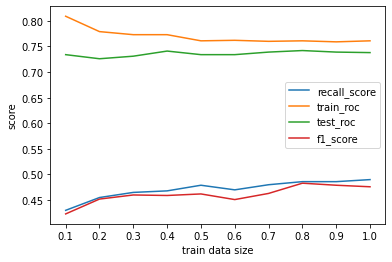

In [28]:
learning_curve_graph(svm_lc_perf_out)

In [29]:
# SVM test 2 set output

In [30]:
# train valid test split
X_train, y_train, X_valid, y_valid, X_test, y_test = train_valid_test_split2(df)
# feature engineering
X_train, X_valid, X_test = ohe(X_train, X_valid, X_test)
# model
params = {'kernel': ke,
          'C': c}
svm =  sv.SVC(random_state=0, kernel=ke, C=c,probability=True)
svm.fit(X_train, y_train)
svm_test_perf = model2(svm, X_train, y_train, X_test, y_test)
svm_test_perf['kernel'] = ke
svm_test_perf['C'] = c
svm_test_perf['name'] = 'svm_test'
svm_test_perf

,acc,cv_score,train_roc,test_roc,recall_score,f1_score,run_time,kernel,C,name
0,0.474,0.478,0.762,0.741,0.474,0.461,1.625,rbf,9,svm_test


In [31]:
svm_performance = pd.DataFrame()
svm_performance=svm_performance.append([svm_fe,svm_tune_perf,svm_gs_perf,svm_lc_perf_out,svm_test_perf]).reset_index()
svm_performance

,index,acc,cv_score,train_roc,test_roc,recall_score,f1_score,run_time,kernel,C,name,train_ratio
0,0,0.415,0.385,0.704,0.701,0.415,0.337,1.891,rbf,1,svm_Feature_engineering,NaN
1,0,0.415,0.385,0.704,0.701,0.415,0.337,1.938,rbf,1,svm_tune,NaN
2,0,0.458,0.408,0.726,0.719,0.458,0.388,1.734,rbf,1.5,svm_tune,NaN
3,0,0.469,0.437,0.736,0.728,0.469,0.415,1.844,rbf,2,svm_tune,NaN
4,0,0.306,0.277,0.519,0.557,0.306,0.253,0.938,sigmoid,1,svm_tune,NaN
5,0,0.308,0.293,0.519,0.557,0.308,0.257,0.938,sigmoid,1.5,svm_tune,NaN
6,0,0.310,0.291,0.519,0.558,0.310,0.259,1.109,sigmoid,2,svm_tune,NaN
7,0,0.504,0.478,0.762,0.745,0.504,0.488,1.844,rbf,9,svm_grid_search,NaN
8,0,0.430,0.422,0.809,0.734,0.430,0.423,0.031,rbf,9,svm_train_size,0.1
9,0,0.455,0.436,0.779,0.726,0.455,0.452,0.094,rbf,9,svm_train_size,0.2


In [32]:
svm_performance.to_excel('./performance/svm_perf_data2.xlsx',index=False)